## Data Analytics: Homicide in Chicago (2001 - 2021)

This notebok is intented to analyse the data from the chicag pd crime dataset.
The dataset can be found in the following [website](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present-Dashboard/5cd6-ry5g).

##### Import all Libs

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from scipy import stats
sns.set_style("whitegrid")
import matplotlib.image as mpimg
from IPython.display import IFrame

##### load data from file

In [3]:
data_iterator = pd.read_csv('data\Crimes_-_2001_to_Present.csv', iterator=True, chunksize=100000)  
crime_data = pd.concat(data_iterator, ignore_index=True)  

# print data shape
crime_data.shape

(7357193, 30)

t

Data format and descriptions:
* 'ID' : Id of case
* 'Case Number': case number
* 'Date': date and time of crime
* 'Block' : number and name of block
* 'IUCR': number
* 'Primary Type' : Types of the crime
* 'Description' : Short description
* 'Location Description' : type of location
* 'Arrest': true or false
* 'Domestic': true or flase
* 'Beat': number
* 'District' : number
* 'Ward': number
* 'Community Area': number
* 'FBI Code': test+number
* 'X Coordinate',
* 'Y Coordinate',
* 'Year',
* 'Updated On',
* 'Latitude',
* 'Longitude',
* 'Location': (lat,long)
* 'Historical Wards 2003-2015': number
* 'Zip Codes',
* 'Community Areas':
* 'Census Tracts',
* 'Wards',
* 'Boundaries - ZIP Codes',
* 'Police Districts',
* 'Police Beats'

In [4]:
#writing a sample to see the structure of the data using excel
#crime_data.head(1000).to_csv("out.csv")

In [5]:
#classic pandas function!
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7357193 entries, 0 to 7357192
Data columns (total 30 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ID                          int64  
 1   Case Number                 object 
 2   Date                        object 
 3   Block                       object 
 4   IUCR                        object 
 5   Primary Type                object 
 6   Description                 object 
 7   Location Description        object 
 8   Arrest                      bool   
 9   Domestic                    bool   
 10  Beat                        int64  
 11  District                    float64
 12  Ward                        float64
 13  Community Area              float64
 14  FBI Code                    object 
 15  X Coordinate                float64
 16  Y Coordinate                float64
 17  Year                        int64  
 18  Updated On                  object 
 19  Latitude             

In [6]:
# another easy tool form pandas
crime_data.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
count,7.357193e+06,7.357193e+06,7.357146e+06,6.742355e+06,6.743710e+06,7.283903e+06,7.283903e+06,7.357193e+06,7.283903e+06,7.283903e+06,7.262693e+06,7.283903e+06,7.265585e+06,7.267646e+06,7.265699e+06,7.265636e+06,7.266726e+06,7.266749e+06
mean,6.697034e+06,1.187826e+03,1.129428e+01,2.271818e+01,3.755149e+01,1.164557e+06,1.885727e+06,2.009252e+03,4.184203e+01,-8.767166e+01,2.739570e+01,1.910515e+04,3.872908e+01,3.813301e+02,2.555284e+01,3.149128e+01,1.492593e+01,1.505077e+02
std,3.312699e+06,7.029053e+02,6.946193e+00,1.383093e+01,2.153791e+01,1.685788e+04,3.228510e+04,5.717439e+00,8.882449e-02,6.111378e-02,1.525669e+01,5.739382e+03,2.008291e+01,2.301652e+02,1.475330e+01,1.913935e+01,6.447537e+00,7.849394e+01
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01,1.000000e+00,2.733000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.629445e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152941e+06,1.859076e+06,2.004000e+03,4.176872e+01,-8.771382e+01,1.400000e+01,2.118400e+04,2.500000e+01,1.760000e+02,1.200000e+01,1.500000e+01,1.000000e+01,8.300000e+01
50%,6.687848e+06,1.034000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.166045e+06,1.890644e+06,2.008000e+03,4.185572e+01,-8.766602e+01,2.700000e+01,2.156000e+04,3.700000e+01,3.790000e+02,2.600000e+01,3.000000e+01,1.600000e+01,1.530000e+02
75%,9.590690e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176363e+06,1.909222e+06,2.014000e+03,4.190668e+01,-8.762829e+01,4.100000e+01,2.224300e+04,5.800000e+01,5.770000e+02,3.700000e+01,5.000000e+01,2.000000e+01,2.210000e+02
max,1.241853e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.021000e+03,4.202291e+01,-8.752453e+01,5.300000e+01,2.691200e+04,7.700000e+01,8.010000e+02,5.000000e+01,6.100000e+01,2.500000e+01,2.770000e+02


### Observations

- There are total of 7357193 records and 30 colums and the datatype is infered by pandas
- Some columns needs to be delated as it is repaeting information
- There are some values in the column type have sub categories. Better to create a highlevel one


## Plotting crimes as a map

The city of chicago pd
image credits: [webpage](https://cdn.vox-cdn.com/thumbor/N8H3RVwbDqCkJjNYMlzavhXU6Dg=/1400x0/filters:no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/16109277/cpdpersonnelbydistrict.jpg)
<br>
Just to shoe the district details

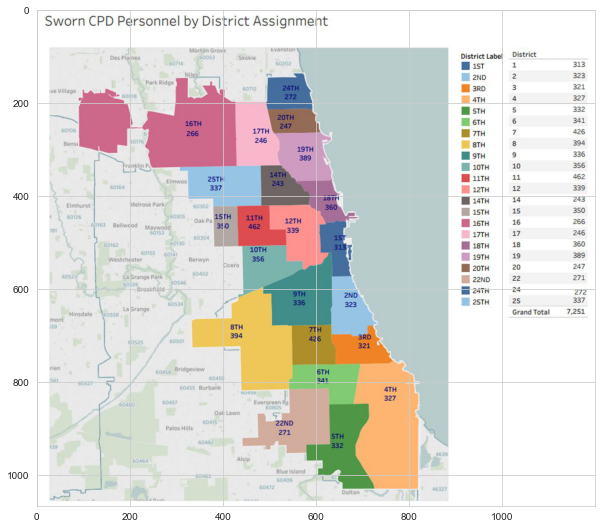

In [7]:
plt.figure(figsize=(10,18))
img = mpimg.imread('images\cpdpersonnelbydistrict.jpg')
plt.imshow(img)


In [8]:
#cleaning the data for the region information
print('Ward column total null values: {}'.format(crime_data['Ward'].isnull().sum()))
print('Community Area total null values:{}'.format(crime_data['Community Area'].isnull().sum()))      
print('District total null values: {}'.format(crime_data['District'].isnull().sum())) 

Ward column total null values: 614838
Community Area total null values:613483
District total null values: 47


In [9]:
# Created a scatterplot of X and Y coordinates vs all crime data available in the dataset
print(crime_data.shape)
crime_data_clean_loc = crime_data.loc[(crime_data['X Coordinate']!=0) & (crime_data['Y Coordinate']!=0)]
print(crime_data_clean_loc.shape)
print('number of deleted rows: ', crime_data.shape[0]-crime_data_clean_loc.shape[0])

(7357193, 30)
(7357077, 30)
number of deleted rows:  116


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All Crime Distribution per District')

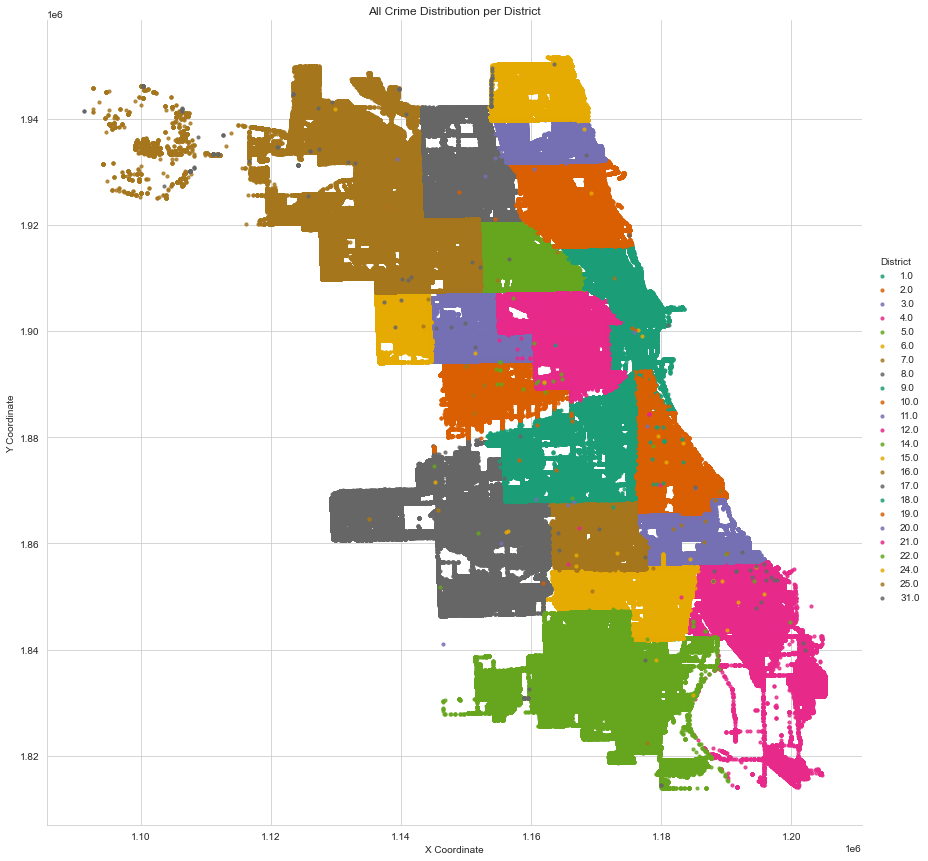

In [10]:
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=crime_data_clean_loc[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10}
          )
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

The plots are so close and it represent the exact map which you can see above <br>

some observations:
- Also there are some data points that are not correctly on the district. This could be an error or data that from different distrit that was registered somewhere else.
- Some areas has gap that may represent some areas like waterbodies or non human occupied areas.


## Plotting Primary types
Plot the different crime types geograhically to see if you can identify any patterns

In [11]:
crime_type = crime_data['Primary Type'].unique()
print('list of crimes: ')
print(crime_type)
print('total length: ',len(crime_type))

list of crimes: 
['BATTERY' 'THEFT' 'NARCOTICS' 'ASSAULT' 'BURGLARY' 'ROBBERY'
 'DECEPTIVE PRACTICE' 'OTHER OFFENSE' 'CRIMINAL DAMAGE'
 'WEAPONS VIOLATION' 'CRIMINAL TRESPASS' 'MOTOR VEHICLE THEFT'
 'SEX OFFENSE' 'INTERFERENCE WITH PUBLIC OFFICER'
 'OFFENSE INVOLVING CHILDREN' 'PUBLIC PEACE VIOLATION' 'PROSTITUTION'
 'GAMBLING' 'CRIM SEXUAL ASSAULT' 'LIQUOR LAW VIOLATION'
 'CRIMINAL SEXUAL ASSAULT' 'ARSON' 'STALKING' 'KIDNAPPING' 'INTIMIDATION'
 'HOMICIDE' 'CONCEALED CARRY LICENSE VIOLATION' 'NON - CRIMINAL'
 'HUMAN TRAFFICKING' 'OBSCENITY' 'PUBLIC INDECENCY'
 'OTHER NARCOTIC VIOLATION' 'NON-CRIMINAL'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'RITUALISM' 'DOMESTIC VIOLENCE']
total length:  36


number of crimes of each category in total

In [12]:
print(crime_data_clean_loc[['Primary Type','ID']].groupby('Primary Type').agg('count'))

                                        ID
Primary Type                              
ARSON                                12412
ASSAULT                             469396
BATTERY                            1348455
BURGLARY                            410632
CONCEALED CARRY LICENSE VIOLATION      755
CRIM SEXUAL ASSAULT                  27882
CRIMINAL DAMAGE                     838250
CRIMINAL SEXUAL ASSAULT               3359
CRIMINAL TRESPASS                   206806
DECEPTIVE PRACTICE                  314285
DOMESTIC VIOLENCE                        1
GAMBLING                             14601
HOMICIDE                             11181
HUMAN TRAFFICKING                       73
INTERFERENCE WITH PUBLIC OFFICER     17666
INTIMIDATION                          4343
KIDNAPPING                            7026
LIQUOR LAW VIOLATION                 14525
MOTOR VEHICLE THEFT                 339070
NARCOTICS                           738427
NON - CRIMINAL                          38
NON-CRIMINA

In [13]:
# plotting all gang violence

col2 = ['Date','Primary Type','Arrest','Domestic','District','X Coordinate','Y Coordinate']
multiple_crimes = crime_data_clean_loc[col2]
multiple_crimes = multiple_crimes[multiple_crimes['Primary Type']\
                  .isin(['HOMICIDE','CONCEALED CARRY LICENSE VIOLATION','NARCOTICS','WEAPONS VIOLATION'])].dropna()

# clean some rouge (0,0) coordinates
# multiple_crimes = multiple_crimes[multiple_crimes['X Coordinate']!=0]

multiple_crimes.head()

,Date,Primary Type,Arrest,Domestic,District,X Coordinate,Y Coordinate
3,09/05/2015 12:45:00 PM,NARCOTICS,True,False,14.0,1152037.0,1920384.0
39,09/05/2015 02:35:00 PM,NARCOTICS,True,False,7.0,1176575.0,1859730.0
40,09/05/2015 02:40:00 PM,WEAPONS VIOLATION,True,False,25.0,1148654.0,1908016.0
45,09/05/2015 03:12:00 PM,WEAPONS VIOLATION,True,False,15.0,1141442.0,1898499.0
48,09/05/2015 03:20:00 PM,NARCOTICS,True,False,11.0,1156237.0,1896878.0


In [14]:
# Print the count for the subset
print(multiple_crimes[['Primary Type','X Coordinate']].groupby('Primary Type').agg('count'))

                                   X Coordinate
Primary Type                                   
CONCEALED CARRY LICENSE VIOLATION           752
HOMICIDE                                  11178
NARCOTICS                                727951
WEAPONS VIOLATION                         90252


C:\Users\HP\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


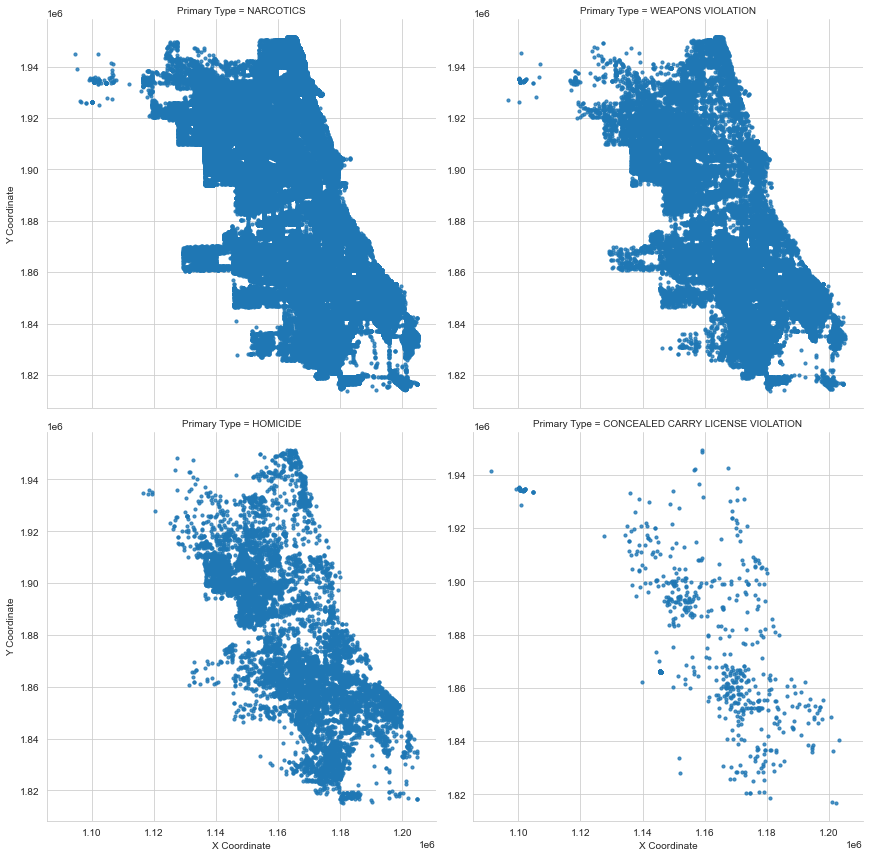

In [15]:
g = sns.lmplot(x="X Coordinate",
               y="Y Coordinate",
               col="Primary Type",
               data=multiple_crimes, 
               col_wrap=2, size=6, fit_reg=False, 
               sharey=False,
               scatter_kws={"marker": "D",
                            "s": 10})

##### observations:
- most of the gang crimes are distributed across the region
- Homicide and Concealed Carry Violation crimes are less in number compared to the other, which gives an illusion of having only spread in some areas

###### Do some analysis on Homiside

In [16]:
df_homicide = crime_data_clean_loc[crime_data_clean_loc['Primary Type']=='HOMICIDE']
df_homicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11181 entries, 3602 to 7357129
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          11181 non-null  int64  
 1   Case Number                 11181 non-null  object 
 2   Date                        11181 non-null  object 
 3   Block                       11181 non-null  object 
 4   IUCR                        11181 non-null  object 
 5   Primary Type                11181 non-null  object 
 6   Description                 11181 non-null  object 
 7   Location Description        11181 non-null  object 
 8   Arrest                      11181 non-null  bool   
 9   Domestic                    11181 non-null  bool   
 10  Beat                        11181 non-null  int64  
 11  District                    11181 non-null  float64
 12  Ward                        10803 non-null  float64
 13  Community Area            

In [17]:
df_homicide[df_homicide.isnull().any(axis=1)].shape

(404, 30)

In [18]:
df_homicide.isnull().sum()

ID                              0
Case Number                     0
Date                            0
Block                           0
IUCR                            0
Primary Type                    0
Description                     0
Location Description            0
Arrest                          0
Domestic                        0
Beat                            0
District                        0
Ward                          378
Community Area                378
FBI Code                        0
X Coordinate                    3
Y Coordinate                    3
Year                            0
Updated On                      0
Latitude                        3
Longitude                       3
Location                        3
Historical Wards 2003-2015     24
Zip Codes                       3
Community Areas                13
Census Tracts                  14
Wards                          13
Boundaries - ZIP Codes         13
Police Districts               13
Police Beats  

There are 15 columns that contains 410 out of 11187 data<br>
droping the data that contains these null values

In [19]:
df_homicide = df_homicide.dropna()
keep_cols = ['Year','Date','Primary Type','Arrest','Domestic','District','Location Description',
             'FBI Code','X Coordinate','Y Coordinate','Latitude','Longitude','Location']

df_homicide = df_homicide[keep_cols].reset_index()

doing some analysis on this data based on date

In [20]:
df_homicide['Date'] = df_homicide['Date'].apply(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,3602,2001,2001-08-22 17:15:00,HOMICIDE,True,False,15.0,STREET,01A,1141945.0,1900001.0,41.881666,-87.754246,"(41.88166577, -87.754245643)"
1,10010,2001,2001-08-22 07:00:00,HOMICIDE,False,False,6.0,VACANT LOT,01A,1172275.0,1854791.0,41.756990,-87.644206,"(41.756989602, -87.644206364)"
2,15799,2001,2001-08-22 20:30:00,HOMICIDE,False,True,15.0,HOUSE,01A,1137038.0,1900142.0,41.882142,-87.772261,"(41.882142138, -87.772260899)"
3,21567,2001,2001-08-23 16:55:00,HOMICIDE,True,False,10.0,STREET,01A,1155001.0,1890353.0,41.854939,-87.706563,"(41.854938872, -87.706562721)"
4,33786,2001,2001-08-25 04:15:00,HOMICIDE,True,False,12.0,APARTMENT,01A,1155261.0,1904123.0,41.892720,-87.705239,"(41.892719968, -87.705238556)"


In [21]:
df_homicide['Year'] = df_homicide['Date'].dt.year
df_homicide['Month'] = df_homicide['Date'].dt.month
df_homicide['Day'] = df_homicide['Date'].dt.day
df_homicide['Weekday'] = df_homicide['Date'].dt.dayofweek
df_homicide['HourOfDay'] = df_homicide['Date'].dt.hour
df_homicide = df_homicide.sort_values('Date')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All Homicides (2001-2021) per District')

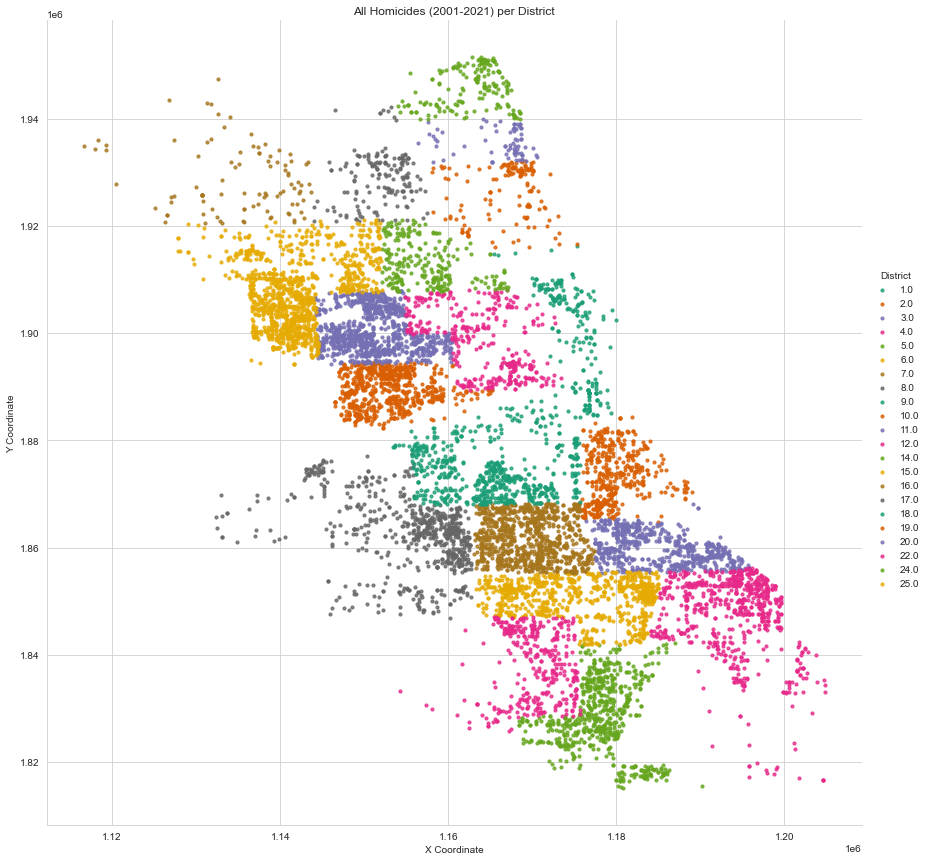

In [22]:
sns.lmplot('X Coordinate',
           'Y Coordinate',
           data=df_homicide[:],
           fit_reg=False, 
           hue="District", 
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                      "s": 10}) 
ax = plt.gca()
ax.set_title("All Homicides (2001-2021) per District")

there are couple of main clusters these crimes happens.<br>
Some of districts have a bigger cluster may be some districts have ahigher density of crimes<br>

yearly homiside rates

Text(0.5, 1.0, 'CHICAGO MURDER RATES: 2001 - 2021')

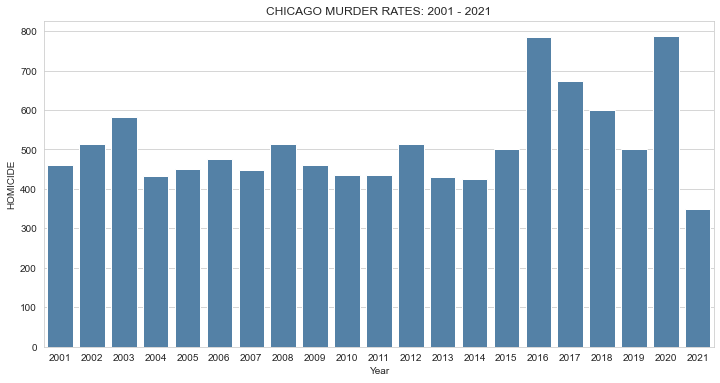

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year',
            y='HOMICIDE',
            data=df_homicide.groupby(['Year'])['Primary Type'].value_counts().\
                 unstack().reset_index(),
            color='steelblue').\
            set_title("CHICAGO MURDER RATES: 2001 - 2021")

#### observations
- most number of crimes happened at 2016 and 2020

#### month analysis

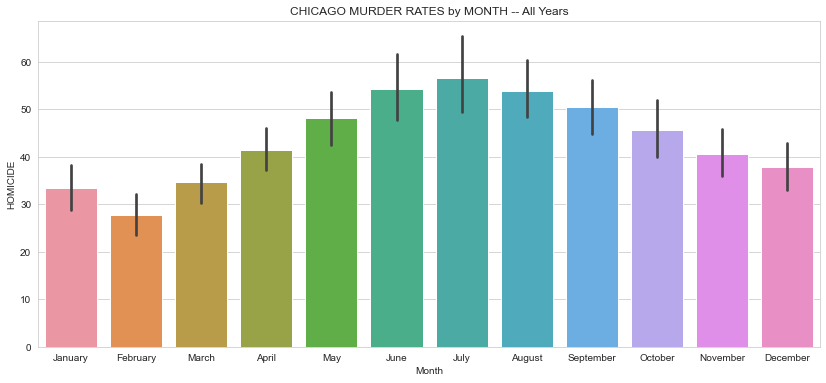

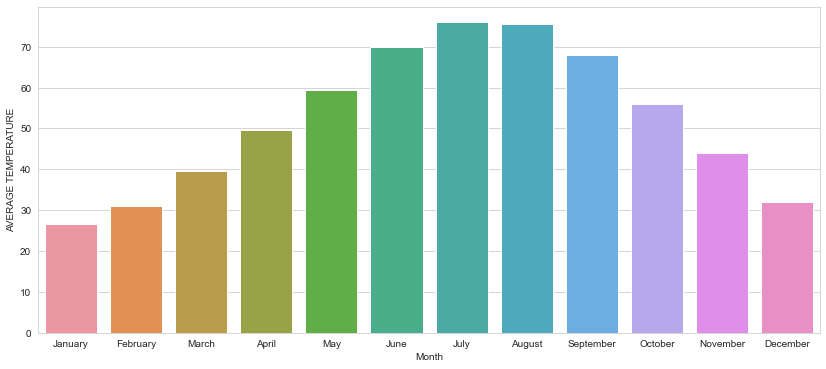

In [24]:
fig, ax = plt.subplots(figsize=(14,6))
month_nms = ['January','February','March','April','May','June','July','August'\
             ,'September','October','November','December']    
fig = sns.barplot(x='Month',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','Month'])['Primary Type'].\
                  value_counts().unstack().reset_index())
ax.set_xticklabels(month_nms)
plt.title("CHICAGO MURDER RATES by MONTH -- All Years")

# plot average monthly temps in Chicago
# source of data:  ncdc.noaa.gov

mntemp = [26.5,31,39.5,49.5,59.5,70,76,75.5,68,56,44,32]
df_temps = pd.DataFrame(list(zip(month_nms,mntemp)),
                       columns=['Month','AVERAGE TEMPERATURE'])
fig, ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x='Month',
                  y='AVERAGE TEMPERATURE',
                  data=df_temps)

##### observations:
- there seems to have a big correlation between the temp and the homiside rates.
- January seems to have a slight variation from this rule. But it could be a continuation from the previous month
- Cold temp has a lowering effect on the crime. This could be obvious that people wont be able to go outside considering how hard the winters in Chicago can be.

#### day of week analysis

Text(0.5, 1.0, 'HOMICIDE BY DAY OF THE WEEK -- All Years')

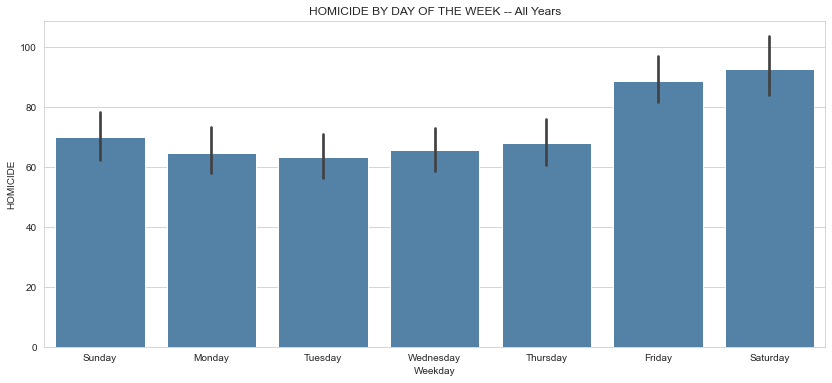

In [25]:
fig, ax = plt.subplots(figsize=(14,6))
week_days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']    
fig = sns.barplot(x='Weekday',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','Weekday'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='steelblue')
ax.set_xticklabels(week_days)
plt.title('HOMICIDE BY DAY OF THE WEEK -- All Years')

##### observations:
- most crime occures in the weekend, especially on friday and saturday
- This is corresponding to how people are avtive for other actiities than usual works, and lot of drug activites happens during the weekend.
- monday to thursday the rates are relatively very low, which strengthens the hypothesis
- Looks like there is a cycle that starts from Wednesday and keep on increasing and then starts decreasing after saturday. This cycle is at its lowest point on Tuesday and then continues to grow agin on wednesday.
- This data is taken over a large period of time(21 years). There is a chance that this could be differnt if we look at individual times frames and factor in the seasonal components.

##### hour of the day analysis

Text(0.5, 1.0, 'HOMICIDE BY HOUR OF THE DAY -- All Years')

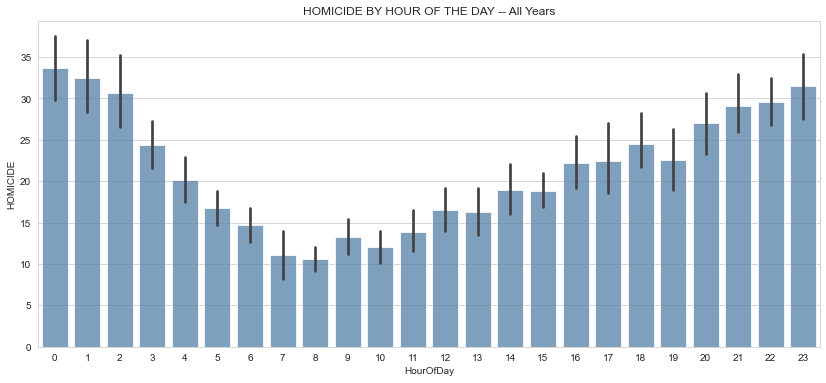

In [26]:
fig, ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x='HourOfDay',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','HourOfDay'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='steelblue',
                  alpha=.75)
plt.title('HOMICIDE BY HOUR OF THE DAY -- All Years')

#### Observations:
- Looking at this graph it is obvious that the more homisides happens at night than any other time. It is obvious in a sense that most actual murders are easy to be planned at night when no one is around.
- Lowest rate is at 7 and 8 in the morning, this could be the time end of the night with morning lights and the peaceful time of the day.
- at 9 AM there is a small spike in the data, this could be the time when most of the commute happens and there is expected increase in traffic at this time.
- You can also see a steady increase from the morning time which contnues until midnight and then there is a decreasing trend until morning.
- After the peak at 12 most of the people will go to sleep including those who do invlve in the crimial activities that could account for the decrease after 12 eventhough it is a perfect time for many illegal activities.
- The error value also shows in many days the actual number of homisides is much more than the actual average number.It is close to 40 in some cases

#### Yearly Homicide Rates considering Domestic Involvement :

Text(0.5, 1.0, 'HOMICIDE - DOMESTIC STATS BY YEAR')

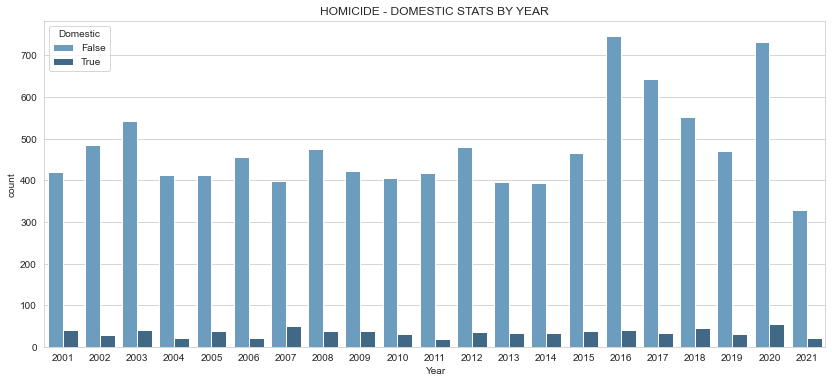

In [27]:
fig, ax = plt.subplots(figsize=(14,6))
df_arrest = df_homicide[['Year','Domestic']]
ax = sns.countplot(x="Year",
                   hue='Domestic',
                   data=df_arrest,
                   palette="Blues_d")
plt.title('HOMICIDE - DOMESTIC STATS BY YEAR')

- In comparsion to thedomastic homiside doesn't have a lot of influence in the total homiside. The 2016 spike in the data doesn't seems to have a corresponding effect on the domestic counterparts. But the 2020 increase does seems to have a simialr effect on domestic cases as well.
<br><br>
May be it could be useful to include do an analysis on the crime baseed on the location of crime

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'CRIME SCENE BY LOCATION FREQUENCY')

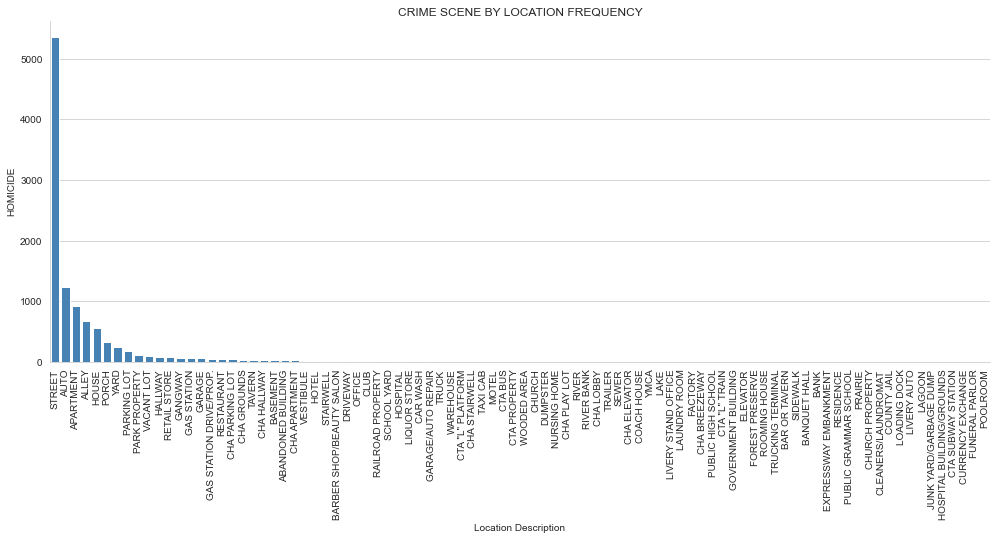

In [28]:
crime_scene = df_homicide['Primary Type'].\
            groupby(df_homicide['Location Description']).\
            value_counts().\
            unstack().\
            sort_values('HOMICIDE',ascending=False).\
            reset_index()

g = sns.factorplot(x='Location Description',
                   y='HOMICIDE',
                   data=crime_scene,
                   kind='bar',
                   size=10,
                   color='steelblue', 
                   saturation=10)

g.fig.set_size_inches(15,5)
g.set_xticklabels(rotation=90)
plt.title('CRIME SCENE BY LOCATION FREQUENCY')

- Majority of the crimes has happened in streets
- 2nd most is the auto category (not sure what it means)
- Most other categories are very small amount, this culd means that those doesnot give a good significant imact on our analysis
- there is a chance that we could eliminate some of these categories for any further modeling tasks as some labels could be related and be combined together.


Text(0.5, 1.0, 'HOMICIDE vs DISTRICT vs YEAR')

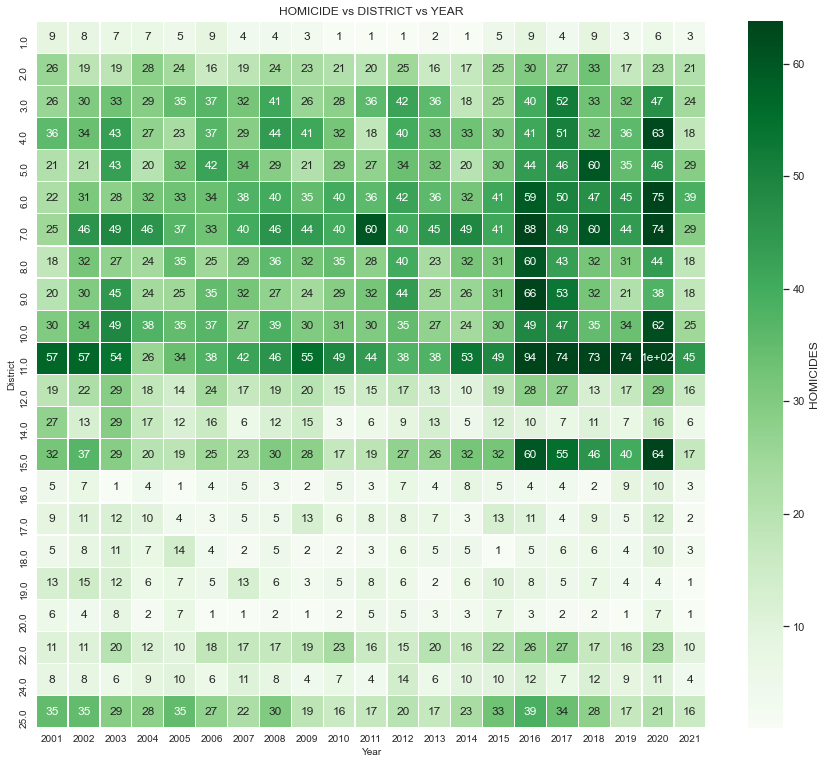

In [29]:
corr = df_homicide.groupby(['District','Year']).count().Date.unstack()
fig, ax = plt.subplots(figsize=(15,13))
sns.set(font_scale=1.0)
sns.heatmap(corr.dropna(axis=1),
            annot=True,
           linewidths=0.2,
           cmap='Greens',
            robust=True,
           cbar_kws={'label': 'HOMICIDES'})
plt.title('HOMICIDE vs DISTRICT vs YEAR')

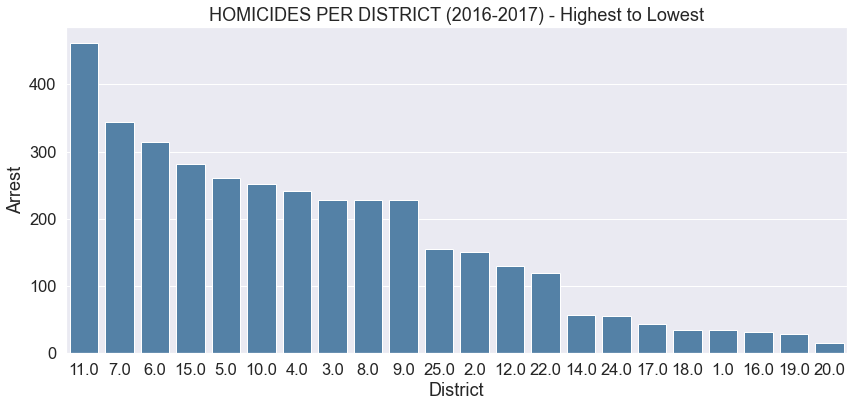

In [30]:
with sns.plotting_context('notebook',font_scale=1.5):
    sorted_homicides = df_homicide[df_homicide['Year']>=2016].groupby(['District']).count()\
                    .Arrest.reset_index().sort_values('Arrest',ascending=False)
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x='District',
                y='Arrest',
                data=sorted_homicides,
                color='steelblue',
                order = list(sorted_homicides['District']),
                label='big')
    plt.title('HOMICIDES PER DISTRICT (2016-2017) - Highest to Lowest')

### map based analysis

In this section we will try to see the data as plotted on a map. This way we can drill deep down based on each region.


In [31]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime

In [41]:
df_homiside_dist = df_homicide.groupby(['District']).count().Arrest.reset_index()
df_homiside_dist['District'] = df_homiside_dist['District'].apply(lambda x:str(int(x)))

chicago = location=[41.85, -87.68] # location to show the map
map_ = folium.Map(chicago,
               zoom_start=10)
plugins.Fullscreen(
    position='topright',
    title='Full Screen',
    title_cancel='Exit',
    force_separate_button=True).add_to(map_)

map_.choropleth(
    geo_data='data\chicago_police_districts.geojson',
    name='choropleth',
    data=df_homiside_dist,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Homicide per Police District : 2001-2021',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(map_)
folium.TileLayer('cartodbpositron').add_to(map_)
folium.LayerControl().add_to(map_)
map_.save("map1_homiside_district.html") 
IFrame('map1_homiside_district.html', width=990, height=700)

- As all the previous maps, this also shows that the districts near to the city region has more homisides than any other place
- The districts those having higher rates are mstly geographically connected.
